# Introduction to Information Theory

## Exercise 1

(entropy, implementation)

Consider two fair dice with 6 sides each.

1. Print the probability distribution of the sum $S$ of the numbers obtained by throwing the two dice.
1. What is the information content in bits of the events $S=2$, $S=11$, $S=5$, $S=7$.
1. Calculate the entropy of S.
1. Lets say you throw the die one at a time, and the first die shows 4. What is the entropy of S after this observation? Was any information gained/lost in the process of observing the outcome of the first die toss? If so, calculate how much information (in bits) was lost or gained.

## Exercise 2

(information gain, implementation or analysis)

Given the dataset below, calculate the information gain for the target variable 'Edible' and each feature ('Weight', 'Smell', 'Spots', 'Smooth'):

In [27]:
import pandas as pd
from scipy.stats import entropy
features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)

print(mushrooms)

p_weight_edible_0 = [3/5,2/5]
H_weight_edible_0 = entropy(p_weight_edible_0,base=2)
p_weight_edible_1 = [2/3,1/3]
H_weight_edible_1 = entropy(p_weight_edible_1,base=2)
H_weight_edible = 3/8*H_weight_edible_1+5/8*H_weight_edible_0
print("H weight edible",H_weight_edible)

p_smell_edible_1 = [1/3,2/3]
p_smell_edible_0 = [2/5, 3/5]
H_smell_edible_1 = entropy(p_smell_edible_1,base=2)
H_smell_edible_0 = entropy(p_smell_edible_0,base=2)
H_smell_edible = 3/8*H_smell_edible_1+5/8*H_smell_edible_0

p_spots_edible_1 = [1/3,2/3]
p_spots_edible_0 = [2/5,3/5]
H_spots_edible_1 = entropy(p_spots_edible_1,base=2)
h_spots_edible_0 = entropy(p_spots_edible_0,base=2)
H_spots_edible = 3/8*H_spots_edible_1+5/8*h_spots_edible_0

p_smooth_edible_0 = [3/5,2/5]
p_smooth_edible_1 = [1/3,2/3]
H_smooth_edible_0 = entropy(p_smooth_edible_0,base=2)
H_smooth_edible_1 = entropy(p_smooth_edible_1,base=2)
H_smooth_edible = 3/8*H_smooth_edible_1 + 5/8*H_smooth_edible_0


#IG(edible,weight)
p_edible = [3/8,5/8]
H_edible = entropy(p_edible,base=2)

p_smooth = [1/2,1/2]
H_smooth = entropy(p_smooth,base=2)

print(H_edible)
print(H_smooth)
IG_edible_weight = H_edible - H_weight_edible
print("IG(edible;weight)",IG_edible_weight)

IG_edible_smell = H_edible - H_smell_edible
print("IG(edible;smell)",IG_edible_smell)

IG_edible_spots = H_edible - H_spots_edible
print("IG(edible;spots)",IG_edible_spots)

IG_edible_smooth = H_smooth - H_smooth_edible
print("IG(edible;smooth)",IG_edible_smooth)



print(mushrooms)

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0
H weight edible 0.9512050593046015
0.954434002924965
1.0
IG(edible;weight) 0.0032289436203635224
IG(edible;smell) 0.0032289436203635224
IG(edible;spots) 0.0032289436203635224
IG(edible;smooth) 0.04879494069539847
   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0


## Exercise 3

(entropy and information gain, implementation or analysis)

The following code simulates the season results for football team F:

In [2]:
from itertools import product
import pandas as pd
import random
random.seed(1)
opponents = ['Team '+chr(ord('A') + i) for i in range(5)]
stadiums = ['Home', 'Away']
games = pd.DataFrame(list(product(opponents, stadiums))*2,
                     columns=['opponent', 'stadium'])
games['result'] = random.choices(["Win", "Loss", "Draw"],
                                 k=len(games))
games

,opponent,stadium,result
0,Team A,Home,Win
1,Team A,Away,Draw
2,Team B,Home,Draw
3,Team B,Away,Win
4,Team C,Home,Loss
5,Team C,Away,Loss
6,Team D,Home,Loss
7,Team D,Away,Draw
8,Team E,Home,Win
9,Team E,Away,Win


1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?
1. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?
1. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

In [13]:
#1
p_win = 7/20
p_draw = 8/20
p_loss = 5/20
H_result = entropy([p_win] + [p_draw] + [p_loss], base=2)
print("H result:",H_result)

#2

#H(result|stadium)
p_home = [3/10,4/10,3/10]
H_away=entropy(p_home,base=2)
print("H result home:", H_away)
p_away = [4/10,4/10,2/10]
H_home=entropy(p_away,base=2)
print("H result away",H_home)
H_result_stadium = H_home*0.5+H_away*0.5
print("H result stadium:", H_result_stadium)

#H(result|opponent)
p_a = [1/4,2/4,1/4]
p_b = [2/4,2/4,0]
p_c = [0,1/4,3/4]
p_d = [1/4,2/4,1/4]
p_e = [3/4,1/4,0]
H_result_opponent = entropy(p_a,base=2)*0.2 + entropy(p_b,base=2)*0.2 +entropy(p_c,base=2)*0.2 +entropy(p_d,base=2)*0.2 +entropy(p_e,base=2)*0.2
print("H result opponent",H_result_opponent)

#3
#IG(result;stadium) = H(result) - H(result;stadium)
IG_result_stadium = H_result - H_result_stadium
print("IG(result;stadium)",IG_result_stadium)
IG_result_opponent = H_result - H_result_opponent
print("IG(result;opponent)",IG_result_opponent)
if IG_result_opponent>IG_result_stadium:
    print("Opponent matters more than result")
else:
    print("Stadium matters more than opponent")


H result: 1.5588718484453603
H result home: 1.570950594454669
H result away 1.5219280948873626
H result stadium: 1.5464393446710156
H result opponent 1.1245112497836531
IG(result;stadium) 0.012432503774344683
IG(result;opponent) 0.4343605986617072
Opponent matters more than result


# Exercise 4

(entropy, implementation or analysis)

Consider the random variable $C$ "a person has a cold" and the random variable $T$ "outside temperature". The joint distribution of the two variables is given below:

In [31]:
import pandas as pd
d = pd.DataFrame({'T_Sunny': [0.3, 0.05], 
                  'T_Rainy': [0.2, 0.15], 
                  'T_Snowy': [0.1, 0.2]}, 
                 index=['C_No', 'C_Yes'])
print(d)

#1
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    attr: str

omega_T = set([Outcome(attr='Rain', weight=0.35), 
             Outcome(attr='Sunny', weight=0.35),
             Outcome(attr='Snowy', weight=0.3)])
X = {'Rain': 1, 'Sunny': 2, 'Snowy': 3}

def pmf_T(X, a, omega):
    A = set(o for o in omega if X[o.attr] is a)
    return probability_weighted(A, omega)

print(pmf_T(X, 3, omega_T))

omega_C = set([Outcome(attr='Yes', weight=0.5), 
             Outcome(attr='No', weight=0.5)])
Y = {'Yes': 'yes', 'No': 'no'}

def pmf_C(X, a, omega):
    A = set(o for o in omega if Y[o.attr] is a)
    return probability_weighted(A, omega)

print(pmf_C(Y, 'yes', omega_C))

#2
from scipy.stats import entropy
p_C = [1/2,1/2]
h_C = entropy(p_C,base=2)
p_T = [0.35,0.35,0.30]
h_T = entropy(p_T,base=2)
print("H(C):",h_C)
print("H(T):",h_T)

#3
H_C_T_sunny = entropy([30/35,5/35],base=2)
H_C_T_rainy = entropy([20/35,15/35],base=2)
H_C_T_snowy = entropy([10/30,20/30],base=2)

print(H_C_T_sunny)
print(H_C_T_rainy)
print(H_C_T_snowy)


       T_Sunny  T_Rainy  T_Snowy
C_No      0.30     0.20      0.1
C_Yes     0.05     0.15      0.2
0.30000000000000004
0.5
H(C): 1.0
H(T): 1.5812908992306927
0.5916727785823274
0.9852281360342515
0.9182958340544894


1. Plot the pmf of $C$ and $T$.
1. Calculate $H(C)$, $H(T)$.
1. Calculate $H(C|T)$, $H(T|C)$. Does the temperature (T) reduce the uncertainty regarding someone having a cold (C)?

# Exercise 5

(decision tree, implementation)

Consider the Boolean expression $A \lor (B \land C)$. The corresponding truth table can be generated with:

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[0, 0, 0, 1, 1, 1, 1, 1]


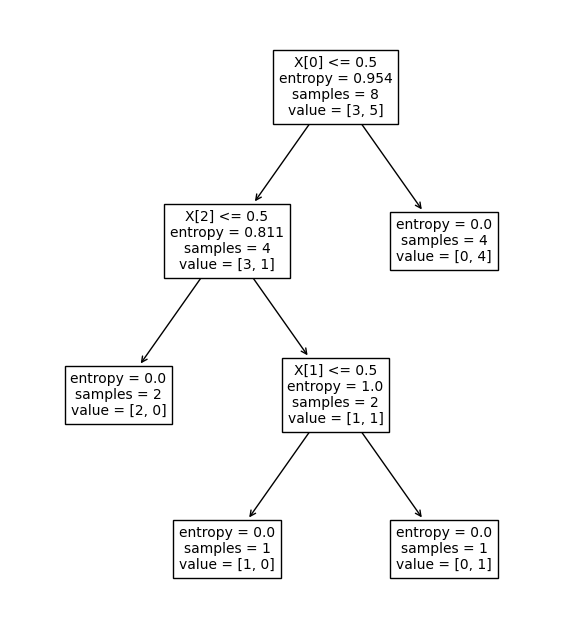

In [3]:
from itertools import product
from sklearn import tree
X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]
print(X)
print(y)
#1
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10)
plt.show() 

1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.
1. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?